# Training Pipeline
Traing models on training data using TrainingPipeline class 

In [17]:
#Change working directory to project direcgtory
import os

current_directory = os.getcwd()
project_name = 'bcppmchurn'
project_path = os.path.join(current_directory.split(project_name)[0], project_name)
os.chdir(project_path)
print(os.getcwd())  

/Users/hamza_hajjini/Desktop/DATA/HAMAZA_HAJJINI/projects/bcppmchurn


In [27]:
import pandas as pd
import numpy as np
from datetime import datetime 

from src.pipelines import training_pipeline
from src.components import data_processing
import importlib
importlib.reload(training_pipeline) 
importlib.reload(data_processing) 
importlib.reload(utils)

from src.components.data_ingestion import get_feature_tables_from_impala, get_target_table
from src.components.data_structuring import StructuringPipeline
from src.components.data_processing import run_training_data_processing_pipeline
from src.pipelines.training_pipeline import TrainingPipeline
from src.eda import utils 

Data Ingestion 

In [ ]:
domains =["data", "voice", "complaints", "payement"]
feature_types = ["stat", "trend"]
dn_group_interval = ["00", "14"]
batch_date = "2024-11-01"
#Initiate a spark session and get table features 
features_dict = get_feature_tables_from_impala(domains, feature_types, dn_group_interval, objective="inference") 
#Get target table
churners_non_churners = get_target_table(table_name="")
#Structure table featues into a dataframe
df, pivoted_df = StructuringPipeline(features_dict, churners_non_churners, objective = "inference").run_structuring_pipeline(batch_date)
df.head()

Structuring 

In [ ]:
df, pivoted_df = StructuringPipeline(features_dict, churners_non_churners, objective = "inference").run_structuring_pipeline(batch_date)
df.head()

In [3]:
#Load data instead
df = pd.read_csv("data/experiments_data/2024-10-11_final_df.csv", index_col=0)
df.head()

,dn,gamme,churn_segment,churn_date,activation_bscs_date,id_date,complaints_complaints_complaint_status_abondon_duration_nb_1m,complaints_complaints_complaint_status_abondon_total_nb_1m,complaints_complaints_complaint_status_autre_duration_nb_1m,complaints_complaints_complaint_status_autre_total_nb_1m,...,voice_call_direction_ic_duration_value_1_3w_3_4w,voice_call_direction_oc_duration_value_1_3w_3_4w,voice_destination_type_international_duration_value_1_3w_3_4w,voice_destination_type_national_duration_value_1_3w_3_4w,voice_termination_type_offnet_duration_value_1_3w_3_4w,voice_termination_type_onnet_duration_value_1_3w_3_4w,voice_weekend_n_duration_value_1_3w_3_4w,voice_weekend_y_duration_value_1_3w_3_4w,voice_workingh_n_duration_value_1_3w_3_4w,voice_workingh_y_duration_value_1_3w_3_4w
0,212602495129,Forfaits 49 dhs,non_churners,2024-02-25,2023-01-17 21:09:34,20240607,NaN,NaN,NaN,NaN,...,1.21109,2.562370,NaN,2.539916,2.484907,2.538944,3.490659,1.080202,2.095236,3.171898
1,212698494964,Forfaits 49 dhs,non_churners,2024-09-27,2024-04-21 14:21:56,20240607,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,212602646609,Forfaits 49 dhs,non_churners,2024-09-27,2024-05-09 13:08:12,20240607,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,212601341395,Forfaits 99 dhs,non_churners,2024-02-19,2022-10-03 18:50:24,20240607,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,212701119852,Forfaits 49 dhs,non_churners,2024-02-12,2020-10-31 12:59:13,20240607,NaN,NaN,NaN,NaN,...,NaN,-2.735131,NaN,-2.735131,-2.772589,-2.677018,-4.262680,0.000000,-3.097515,-2.581298


Processing of training data

In [4]:
x_train_norm, y_train, x_dev_norm, y_dev, x_test_norm, y_test = run_training_data_processing_pipeline(df, current_date ="2024-11-01", save_final_data=True)

Sampling data based on churn segement .......................................................
max nbr of non_churners 493363 select nbr_non_churners 110000 ...........................
max nbr of inactif unknown churners 233097 selected nbr_inactif_churners 100000 ......
max nbr of nbr_churn_operateur 10602 selected nbr_churn_operateur 10602 ........
Creating churn target from churn segemnt....................................................... 
Train, dev and test Spliting .......................................................
Taking samples from train, dev and test sets .......................................................
df_train shape :(176481, 3582) .......................................................
df_dev shape: (30000, 3582) .......................................................
df_test shape: (10000, 3582) .......................................................
df_train
Adding tenure column to data
df_dev
Adding tenure column to data
df_test
Adding tenure column to dat

/Users/hamza_hajjini/Desktop/DATA/HAMAZA_HAJJINI/projects/bcppmchurn/src/components/data_processing.py:291: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train = df_train.fillna(0)
/Users/hamza_hajjini/Desktop/DATA/HAMAZA_HAJJINI/projects/bcppmchurn/src/components/data_processing.py:292: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_dev = df_dev.fillna(0)
/Users/hamza_hajjini/Desktop/DATA/HAMAZA_HAJJINI/projects/bcppmchurn/src/components/data_processing.py:293: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated 

Total number of missing values in df_train after filling all nan with 0 is : 0...........................
df_train
Dropped columns : ['dn','churn_segment','churn_date', 'activation_bscs_date','id_date'] from df
Number of duplicates in df 4734
Dropping duplcated values
df_dev
Dropped columns : ['dn','churn_segment','churn_date', 'activation_bscs_date','id_date'] from df
Number of duplicates in df 436
Dropping duplcated values
df_test
Dropped columns : ['dn','churn_segment','churn_date', 'activation_bscs_date','id_date'] from df
Number of duplicates in df 74
Dropping duplcated values
df_train.......................................................
Encoding gamme feature .......................................................
df_dev .......................................................
Encoding gamme feature .......................................................
df_test.......................................................
Encoding gamme feature ........................................

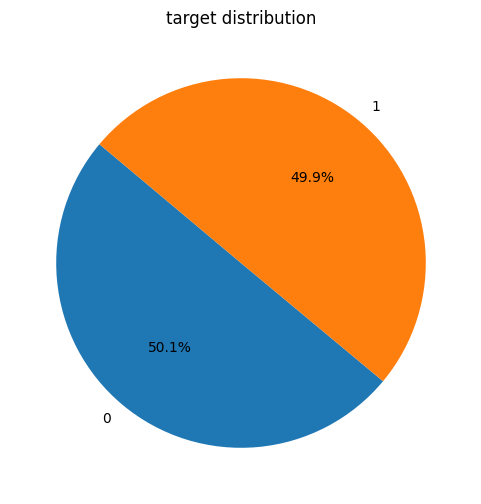

In [5]:
utils.vis_target_distribution(y_train["churn"])

Model training

188037, 2101
16132, 2101
5437, 2101

Loading training data = x_train_norm, y_train, x_dev_norm, y_dev, x_test_norm, y_test ...............................................
------------------
x_train shape : (98839, 532)
y_train shape : (98839, 1)
------------------
x_dev shape : (17243, 532)
y_dev shape : (17243, 1)
------------------
x_test shape : (5777, 532)
y_test shape : (5777, 1)
Transforming DataFrames to DMatrix ...............................................
Training xgboost model ...............................................
[0]	train-logloss:0.68700	dev-logloss:0.69172
[1]	train-logloss:0.68098	dev-logloss:0.69034
[2]	train-logloss:0.67509	dev-logloss:0.68898
[3]	train-logloss:0.66931	dev-logloss:0.68772
[4]	train-logloss:0.66364	dev-logloss:0.68432
[5]	train-logloss:0.65812	dev-logloss:0.68307
[6]	train-logloss:0.65270	dev-logloss:0.68181
[7]	train-logloss:0.64737	dev-logloss:0.68029
[8]	train-logloss:0.64215	dev-logloss:0.67921
[9]	train-logloss:0.63698	dev-logloss:0.67807
[10]	train-logloss:0.63190	dev-logl

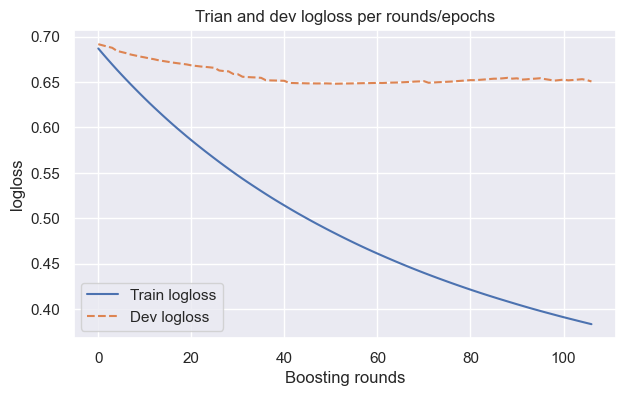

Computing predictions on test data for evaluation...............................................
Reporting model performance ...............................................
                  train set      ||     test set
------------------------------------------------------------
xgboost accuracy      : 0.8819595503799108  ||  0.8454214990479487
xgboost precision     : 0.9385019894362101  ||  0.9454787234042553
xgboost recall        : 0.8171724948336643  ||  0.7347571477781605
xgboost f1 score      : 0.8736448800563167  ||  0.8269044388447373
xgboost roc_auc_score : 0.8818790264633348  ||  0.8459798264986836
-------------------------------------------------------------


/Users/hamza_hajjini/Desktop/DATA/HAMAZA_HAJJINI/projects/bcppmchurn/src/eda/utils.py:291: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


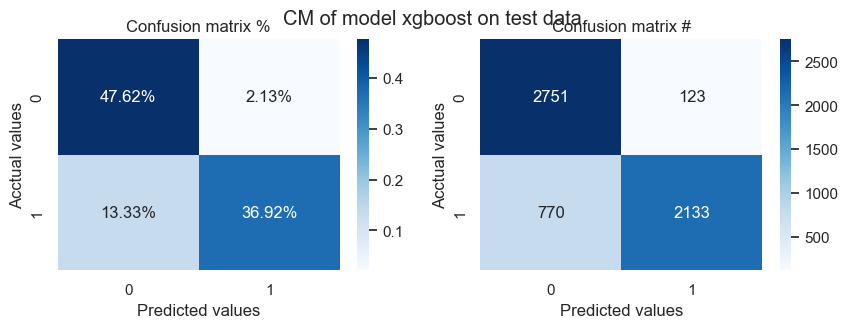

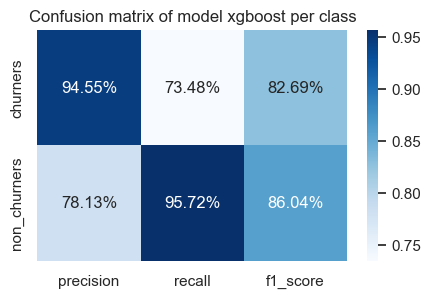

Plot roc curve


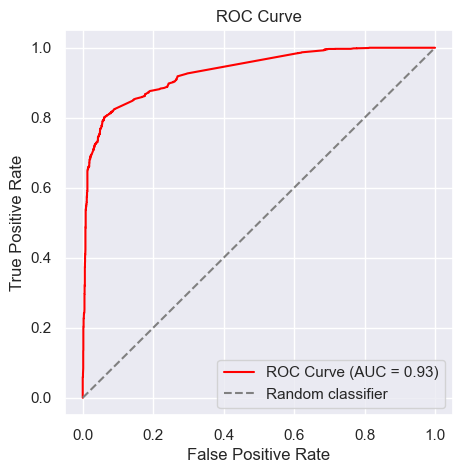

Plot calibration curve to evaluate model calibration


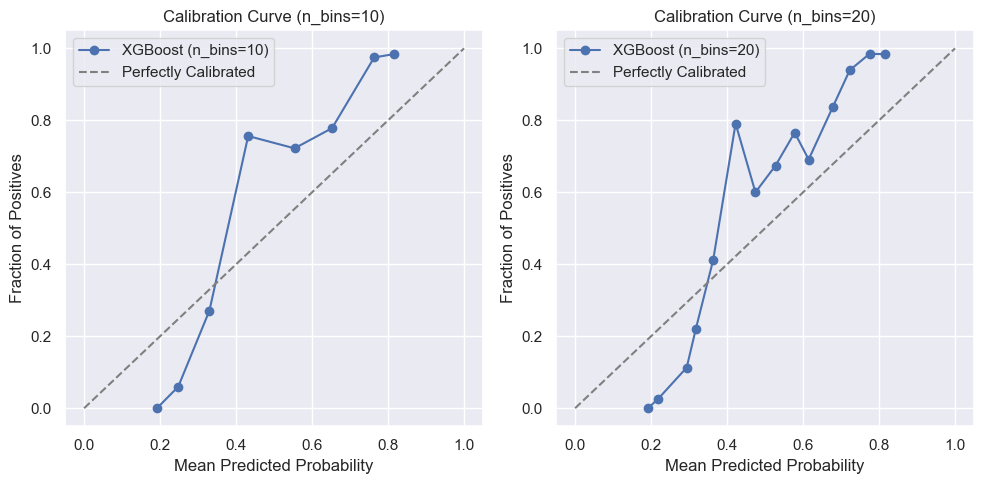

Get feature importance from model
Plot number of correctly predicted scores and wrong ones
Plot data distribution of acctual and predicted target with tsne
Applying tsne on data
Ploting data distribution


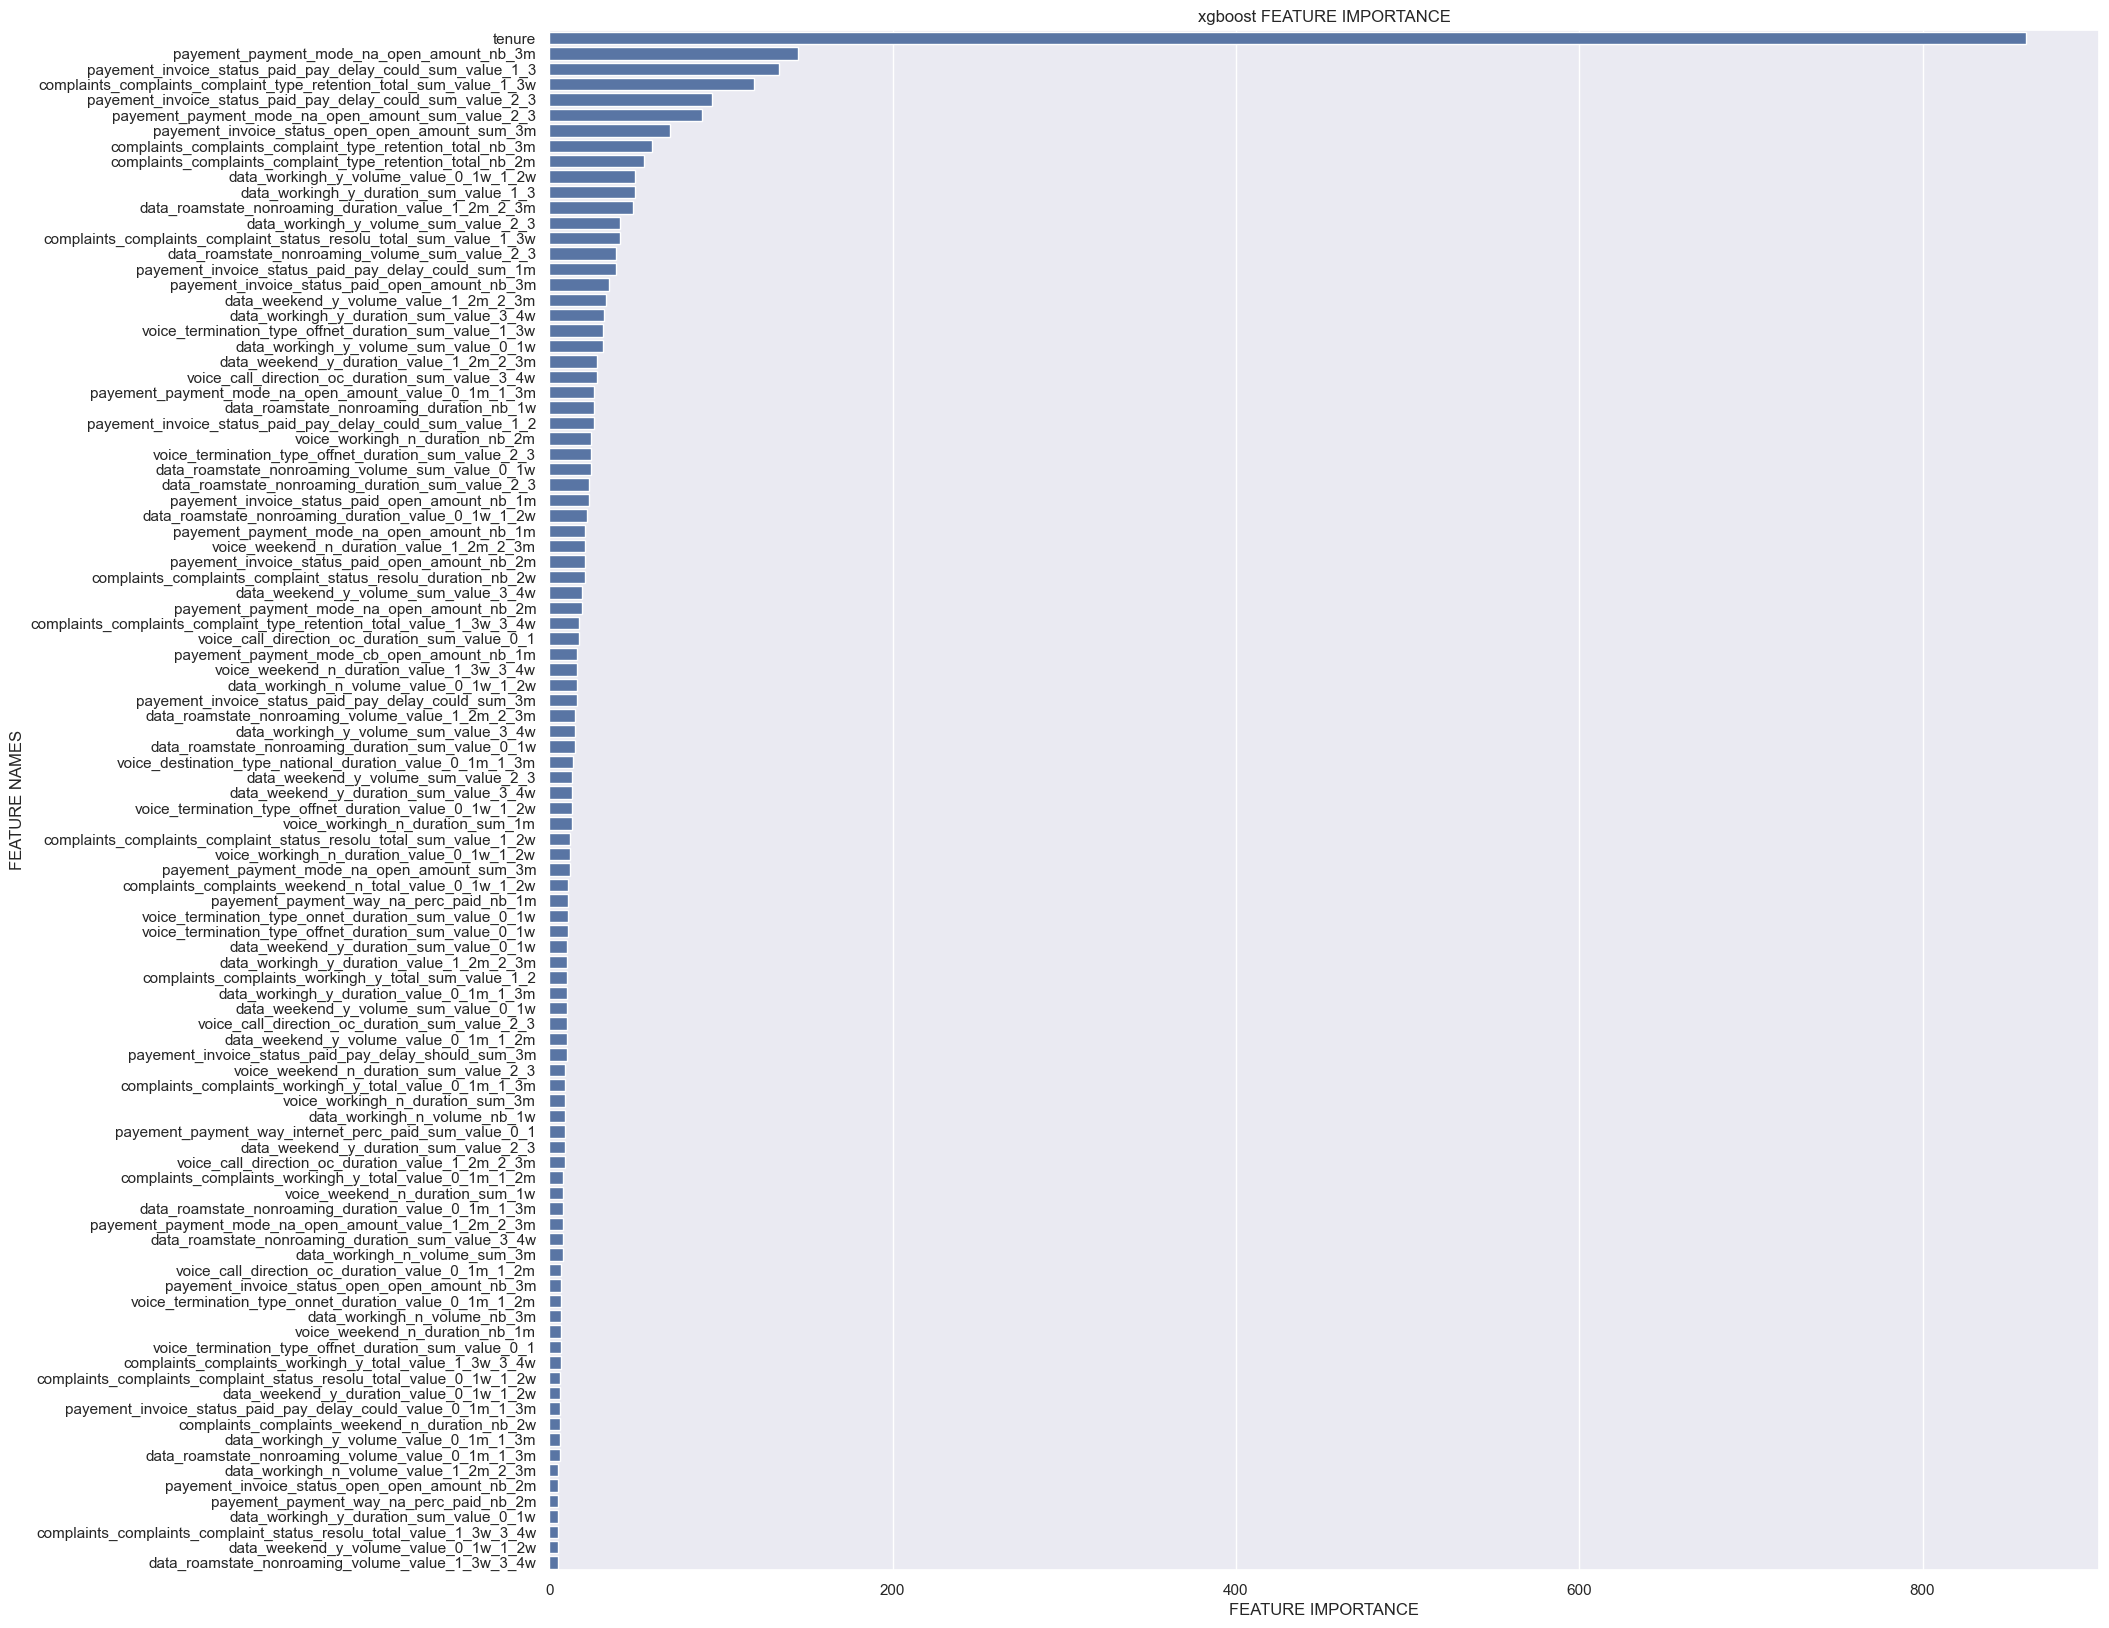

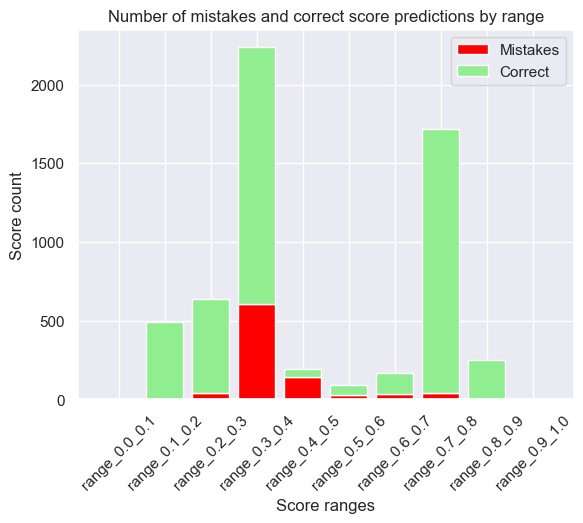

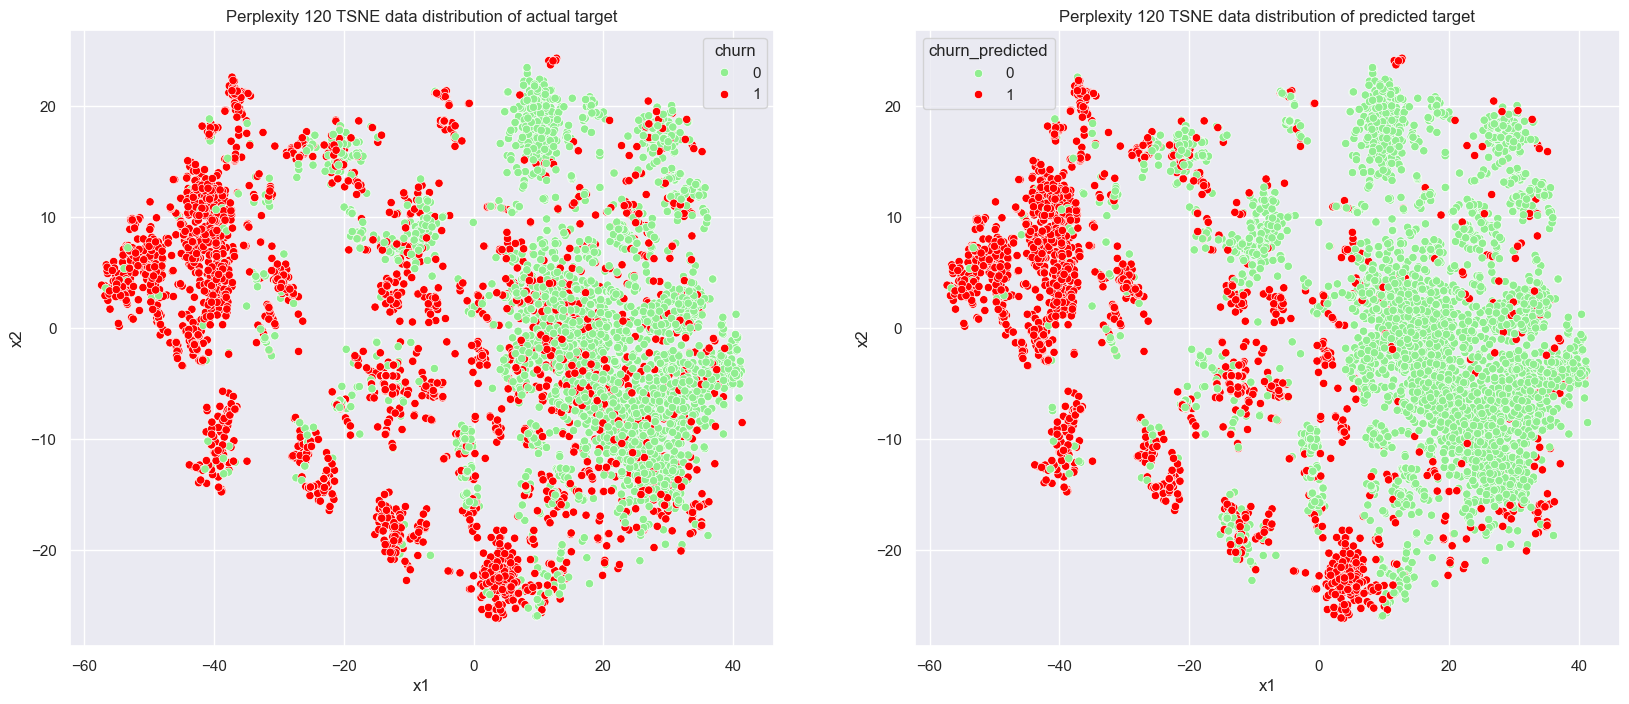

Precision recall curve for choosing the best thereshold


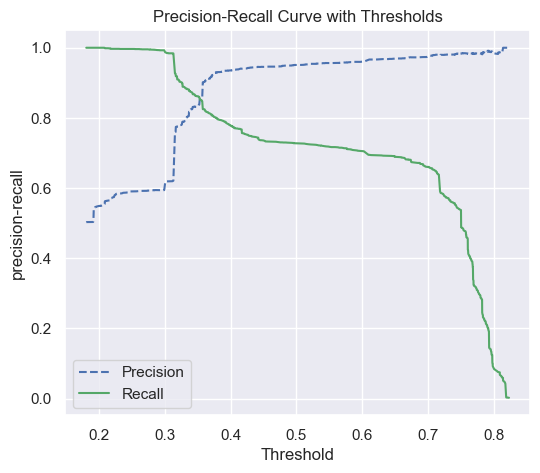

In [28]:
data_date = "2024-12-20"
XGB_MODEL, eval_hist, x_test_norm, y_train, y_test, dtrain, dtest = TrainingPipeline().run_training_pipeline(data_date, 
                                                                                                                num_boosting_rounds = 10000, 
                                                                                                                early_stopping_rounds=55, 
                                                                                                                max_depth=5, 
                                                                                                                learning_rate=0.01, 
                                                                                                                eval_metric="aucpr", 
                                                                                                                THRESHOLD = 0.45)

In [ ]:
TrainingPipeline().evaluate_model(XGB_MODEL, eval_hist, x_test_norm, y_train, y_test, dtrain, dtest, THRESHOLD=0.35)

In [ ]:
#TrainingPipeline().save_model(XGB_MODEL, "xgb_model_iter2_f1_87")

### Random Search 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from scipy.stats import uniform, randint

# Define the parameter distributions
param_dist = {
    'n_estimators': randint(1000, 1500),         # Randomly pick an integer between 100 and 500
    'learning_rate': uniform(0.01, 0.3),         # Uniformly pick a float between 0.01 and 0.31
    'max_depth': randint(3, 10),                 # Randomly pick an integer between 3 and 10
    'min_child_weight': randint(1, 6),           # Randomly pick an integer between 1 and 6
    'subsample': uniform(0.6, 0.4),              # Uniformly pick a float between 0.6 and 1.0
    'colsample_bytree': uniform(0.6, 0.4),       # Uniformly pick a float between 0.6 and 1.0
    'gamma': uniform(0, 0.5),                    # Uniformly pick a float between 0 and 0.5
}

# Create the XGBoost classifier
xgb_model = xgb.XGBClassifier(eval_metric='logloss')

# Random search with 50 iterations and 3-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=3,
    verbose=3,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(x_train_norm, y_train)

# Get the best model and parameters
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

In [ ]:
data_date = "2024-11-26"
XGB_MODEL = TrainingPipeline().run_training_pipeline(data_date, num_boosting_rounds = 419, early_stopping_rounds=100, max_depth=9, learning_rate=0.06990213464750791, eval_metric="logloss", THRESHOLD = 0.5)

### Performance history 

#### 2024-12-02_xgb_model_iter2_f1_87

Computing predictions on test data for evaluation...............................................
Reporting model performance ...............................................

                  train set      ||     test set
    ------------------------------------------------------------
    
xgboost accuracy    : 0.9043013426156141  ||  0.85608719748753

xgboost precision   : 0.9196609894126885  ||  0.8743080429827418

xgboost recall      : 0.9078370576285684  ||  0.8723196881091618

xgboost f1 score    : 0.9137107730384838  ||  0.87331273377785

    -------------------------------------------------------------

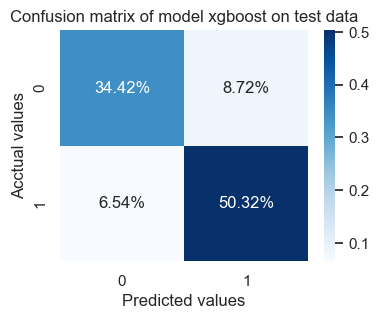